In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## ...

In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


This table / dataset is the FEATURE MATRIX, often defined as variable X

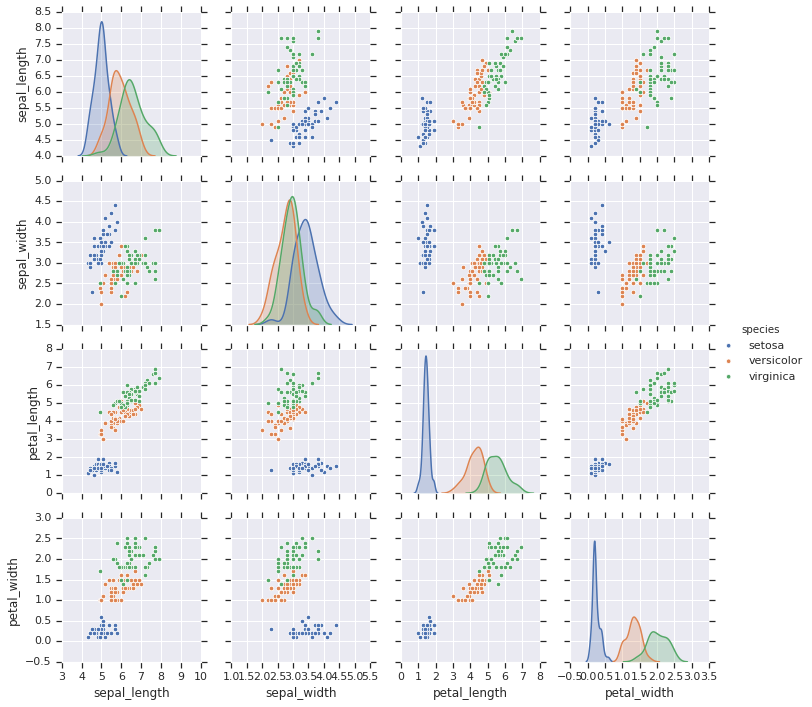

In [5]:
%matplotlib inline
sb.set()
sb.pairplot(iris, hue='species', height=2.5);

Woah there's a _Planets Dataset_?!

In [6]:
planets = sb.load_dataset('planets')
planets.shape

(1035, 6)

In [21]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [14]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [23]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [24]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Okay back to the main Chapter 5 work stuff

In [27]:
X_iris = iris.drop('species', axis=1)
X_iris.shape
# This tells me the shape ((x,y), or (rows,cols) of the new array)

(150, 4)

In [28]:
y_iris = iris['species']
y_iris.shape
# This is the Target Vector

(150,)

### Supervised Learning Example

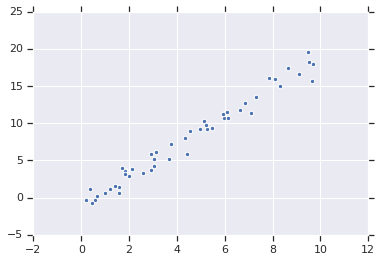

In [29]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [30]:
# Choose Hyperparameters - I think I understand these but I'm not 100% sure. Let's work through this
# first, and then if I continue to not get it, I'll email the profs about it
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Okay, so it seems that, where there is a difference between a CLASS (of a Model) and an INSTANCE (of a Model)
# This makes sense; the CLASS is the base, and the INSTANCE is a created entity inheriting everythibng as default
# from the CLASS, and are modified as per usual.
# HYPERPARAMETERS seem to be parameters that dictate how the INSTANCE works - giving it a one-step-below-default level
# of initiators.

In [31]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [32]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.coef_

array([1.9776566])

In [34]:
model.intercept_

-0.9033107255311146

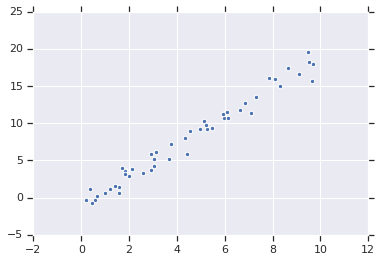

In [35]:
plt.scatter(X,y)

In [36]:
xfit = np.linspace(-1, 11)

In [37]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

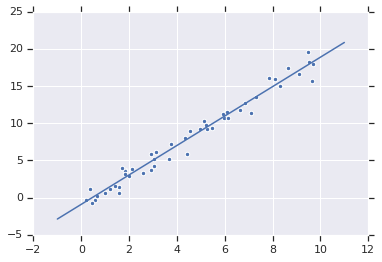

In [38]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised Learning Example: Iris Classification

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [40]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality

In [43]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

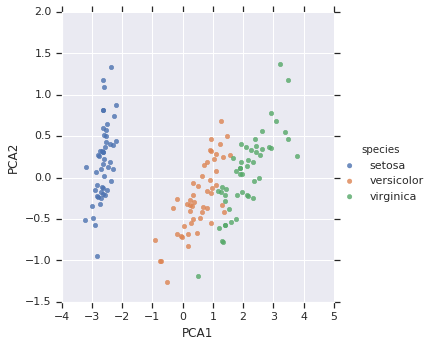

In [45]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sb.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised Learning Example: Iris Clustering

In [51]:
from sklearn.mixture import GaussianMixture as GMM     # 1. Choose the model class
model = GMM(n_components=3,covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

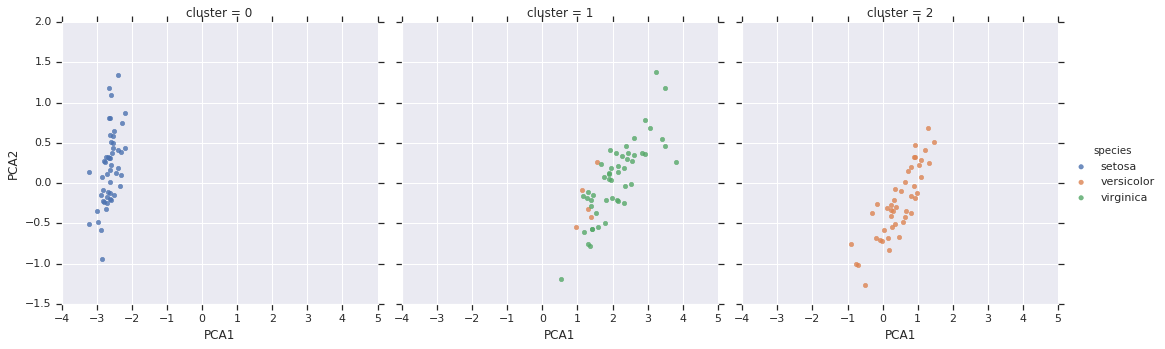

In [53]:
iris['cluster'] = y_gmm
sb.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);